### Take the Shakespeare play you've previously been analyzing and construct a network visualization

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import dash
import dash_cytoscape as cyto
from dash import html, dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request

In [3]:
_send_jupyter_config_comm_request()

In [5]:
JupyterDash.infer_jupyter_proxy_config()

In [6]:
response = requests.get('https://www.gutenberg.org/files/1513/1513-h/1513-h.htm')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
document = document.text

In [7]:
# truncating the document to the actual start of the text
document = document[document.find('ACT I'):document.find('*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')]

In [8]:
acts = document.split('ACT')[1:]
len(acts)

6

In [9]:
characters = [
    'ESCALUS',
    'MERCUTIO',
    'PARIS',
    'PAGE',
    'MONTAGUE',
    'LADY MONTAGUE',
    'ROMEO',
    'BENVOLIO',
    'ABRAM',
    'BALTHASAR',
    'CAPULET',
    'LADY CAPULET',
    'JULIET',
    'TYBALT',
    'CAPULET’S COUSIN',
    'NURSE',
    'PETER',
    'SAMPSON',
    'GREGORY',
    'SERVANT',
    'FRIAR LAWRENCE',
    'FRIAR JOHN',
    'APOTEHCARY',
    'FIRST MUSICIAN',
    'SECOND MUSICIAN',
    'THIRD MUSICIAN'
]

In [10]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [11]:
connections

{('ESCALUS', 'MERCUTIO'): 0,
 ('ESCALUS', 'PARIS'): 0,
 ('ESCALUS', 'PAGE'): 0,
 ('ESCALUS', 'MONTAGUE'): 0,
 ('ESCALUS', 'LADY MONTAGUE'): 0,
 ('ESCALUS', 'ROMEO'): 0,
 ('ESCALUS', 'BENVOLIO'): 0,
 ('ESCALUS', 'ABRAM'): 0,
 ('ESCALUS', 'BALTHASAR'): 0,
 ('ESCALUS', 'CAPULET'): 0,
 ('ESCALUS', 'LADY CAPULET'): 0,
 ('ESCALUS', 'JULIET'): 0,
 ('ESCALUS', 'TYBALT'): 0,
 ('ESCALUS', 'CAPULET’S COUSIN'): 0,
 ('ESCALUS', 'NURSE'): 0,
 ('ESCALUS', 'PETER'): 0,
 ('ESCALUS', 'SAMPSON'): 0,
 ('ESCALUS', 'GREGORY'): 0,
 ('ESCALUS', 'SERVANT'): 0,
 ('ESCALUS', 'FRIAR LAWRENCE'): 0,
 ('ESCALUS', 'FRIAR JOHN'): 0,
 ('ESCALUS', 'APOTEHCARY'): 0,
 ('ESCALUS', 'FIRST MUSICIAN'): 0,
 ('ESCALUS', 'SECOND MUSICIAN'): 0,
 ('ESCALUS', 'THIRD MUSICIAN'): 0,
 ('MERCUTIO', 'PARIS'): 0,
 ('MERCUTIO', 'PAGE'): 0,
 ('MERCUTIO', 'MONTAGUE'): 1,
 ('MERCUTIO', 'LADY MONTAGUE'): 0,
 ('MERCUTIO', 'ROMEO'): 4,
 ('MERCUTIO', 'BENVOLIO'): 4,
 ('MERCUTIO', 'ABRAM'): 0,
 ('MERCUTIO', 'BALTHASAR'): 0,
 ('MERCUTIO', 'CAPULET

In [12]:
for k,v in charnum.items():
    print(k,v)

ESCALUS 0
MERCUTIO 4
PARIS 5
PAGE 1
MONTAGUE 3
LADY MONTAGUE 1
ROMEO 14
BENVOLIO 7
ABRAM 1
BALTHASAR 2
CAPULET 12
LADY CAPULET 10
JULIET 11
TYBALT 3
CAPULET’S COUSIN 1
NURSE 11
PETER 2
SAMPSON 1
GREGORY 1
SERVANT 5
FRIAR LAWRENCE 7
FRIAR JOHN 1
APOTEHCARY 0
FIRST MUSICIAN 1
SECOND MUSICIAN 1
THIRD MUSICIAN 1


In [13]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)
    
graphitems

[{'data': {'id': 'ESCALUS', 'label': 'Escalus', 'size': '0'}},
 {'data': {'id': 'MERCUTIO', 'label': 'Mercutio', 'size': '4'}},
 {'data': {'id': 'PARIS', 'label': 'Paris', 'size': '5'}},
 {'data': {'id': 'PAGE', 'label': 'Page', 'size': '1'}},
 {'data': {'id': 'MONTAGUE', 'label': 'Montague', 'size': '3'}},
 {'data': {'id': 'LADY MONTAGUE', 'label': 'Lady Montague', 'size': '1'}},
 {'data': {'id': 'ROMEO', 'label': 'Romeo', 'size': '14'}},
 {'data': {'id': 'BENVOLIO', 'label': 'Benvolio', 'size': '7'}},
 {'data': {'id': 'ABRAM', 'label': 'Abram', 'size': '1'}},
 {'data': {'id': 'BALTHASAR', 'label': 'Balthasar', 'size': '2'}},
 {'data': {'id': 'CAPULET', 'label': 'Capulet', 'size': '12'}},
 {'data': {'id': 'LADY CAPULET', 'label': 'Lady Capulet', 'size': '10'}},
 {'data': {'id': 'JULIET', 'label': 'Juliet', 'size': '11'}},
 {'data': {'id': 'TYBALT', 'label': 'Tybalt', 'size': '3'}},
 {'data': {'id': 'CAPULET’S COUSIN',
   'label': 'Capulet’S Cousin',
   'size': '1'}},
 {'data': {'id': 

In [14]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)
    
graphitems

[{'data': {'id': 'ESCALUS', 'label': 'Escalus', 'size': '0'}},
 {'data': {'id': 'MERCUTIO', 'label': 'Mercutio', 'size': '4'}},
 {'data': {'id': 'PARIS', 'label': 'Paris', 'size': '5'}},
 {'data': {'id': 'PAGE', 'label': 'Page', 'size': '1'}},
 {'data': {'id': 'MONTAGUE', 'label': 'Montague', 'size': '3'}},
 {'data': {'id': 'LADY MONTAGUE', 'label': 'Lady Montague', 'size': '1'}},
 {'data': {'id': 'ROMEO', 'label': 'Romeo', 'size': '14'}},
 {'data': {'id': 'BENVOLIO', 'label': 'Benvolio', 'size': '7'}},
 {'data': {'id': 'ABRAM', 'label': 'Abram', 'size': '1'}},
 {'data': {'id': 'BALTHASAR', 'label': 'Balthasar', 'size': '2'}},
 {'data': {'id': 'CAPULET', 'label': 'Capulet', 'size': '12'}},
 {'data': {'id': 'LADY CAPULET', 'label': 'Lady Capulet', 'size': '10'}},
 {'data': {'id': 'JULIET', 'label': 'Juliet', 'size': '11'}},
 {'data': {'id': 'TYBALT', 'label': 'Tybalt', 'size': '3'}},
 {'data': {'id': 'CAPULET’S COUSIN',
   'label': 'Capulet’S Cousin',
   'size': '1'}},
 {'data': {'id': 

In [15]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
#graphitems

10


In [25]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'black',
                    'background-color': 'red',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/markaandal@ucla.edu/proxy/8050/


/opt/conda/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [17]:
import networkx as nx
import matplotlib.pyplot as plt

### Description of the network's density and the "most important" nodes

In [18]:
nxgraphitems = []

# for k,v in charnum.items():
#     dashnode = k
#     graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('MERCUTIO', 'MONTAGUE'),
 ('MERCUTIO', 'ROMEO'),
 ('MERCUTIO', 'BENVOLIO'),
 ('MERCUTIO', 'CAPULET'),
 ('MERCUTIO', 'LADY CAPULET'),
 ('MERCUTIO', 'TYBALT'),
 ('MERCUTIO', 'NURSE'),
 ('MERCUTIO', 'PETER'),
 ('PARIS', 'PAGE'),
 ('PARIS', 'MONTAGUE'),
 ('PARIS', 'ROMEO'),
 ('PARIS', 'BENVOLIO'),
 ('PARIS', 'BALTHASAR'),
 ('PARIS', 'CAPULET'),
 ('PARIS', 'LADY CAPULET'),
 ('PARIS', 'JULIET'),
 ('PARIS', 'NURSE'),
 ('PARIS', 'PETER'),
 ('PARIS', 'SERVANT'),
 ('PARIS', 'FRIAR LAWRENCE'),
 ('PARIS', 'FIRST MUSICIAN'),
 ('PARIS', 'SECOND MUSICIAN'),
 ('PARIS', 'THIRD MUSICIAN'),
 ('PAGE', 'MONTAGUE'),
 ('PAGE', 'ROMEO'),
 ('PAGE', 'BALTHASAR'),
 ('PAGE', 'CAPULET'),
 ('PAGE', 'LADY CAPULET'),
 ('PAGE', 'JULIET'),
 ('PAGE', 'FRIAR LAWRENCE'),
 ('MONTAGUE', 'LADY MONTAGUE'),
 ('MONTAGUE', 'ROMEO'),
 ('MONTAGUE', 'BENVOLIO'),
 ('MONTAGUE', 'ABRAM'),
 ('MONTAGUE', 'BALTHASAR'),
 ('MONTAGUE', 'CAPULET'),
 ('MONTAGUE', 'LADY CAPULET'),
 ('MONTAGUE', 'JULIET'),
 ('MONTAGUE', 'TYBALT'),
 ('MONTAGUE

In [19]:
G = nx.Graph()
G.add_edges_from(nxgraphitems)

dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Capulet        : 0.957
Lady Capulet   : 0.913
Romeo          : 0.826
Benvolio       : 0.696
Montague       : 0.652
Nurse          : 0.652
Paris          : 0.652
Tybalt         : 0.609
Friar Lawrence : 0.609
Juliet         : 0.565
Peter          : 0.478
Servant        : 0.391
Lady Montague  : 0.391
Abram          : 0.391
Sampson        : 0.391
Gregory        : 0.391
Mercutio       : 0.348
Page           : 0.348
Balthasar      : 0.348
First Musician : 0.348
Second Musician: 0.348
Third Musician : 0.348
Capulet’S Cousin: 0.304
Friar John     : 0.043


Per the dash cytoscape lecture, I utilized the degree centrality to determine the "most important" node. In this case, Capulet, which has a 0.957 degree centrality.

### Community Classification

"fiery Montagues are distinguished by wearing red, while rival Capulets are dressed in blue" - let's see if we can classify the communities

In [21]:
from networkx.algorithms.community import greedy_modularity_communities

[['PETER', 'LADY CAPULET', 'THIRD MUSICIAN', 'BALTHASAR', 'FRIAR LAWRENCE', 'FRIAR JOHN', 'PARIS', 'SECOND MUSICIAN', 'FIRST MUSICIAN', 'MONTAGUE', 'PAGE'], ['CAPULET’S COUSIN', 'MERCUTIO', 'BENVOLIO', 'ROMEO', 'SERVANT', 'JULIET', 'TYBALT', 'NURSE'], ['CAPULET', 'LADY MONTAGUE', 'ABRAM', 'SAMPSON', 'GREGORY']]


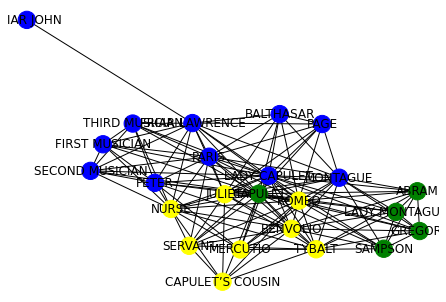

In [49]:
greedy_modularity_communities(G)
communities = greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number
        
communities = greedy_modularity_communities(G)

node_groups = []
for com in communities:
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('yellow')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()        

In [46]:
graphitems = []

# size_correction_factor = max(charnum.values())

for k,v in charnum.items():
    if k in node_groups[0]:
        modularity = 'blue'
    elif k in node_groups[1]:
        modularity = 'green'
    else:
        modularity = 'red'
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v),'modularity': modularity}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
graphitems

10


[{'data': {'id': 'ESCALUS',
   'label': 'Escalus',
   'size': '0',
   'modularity': 'red'}},
 {'data': {'id': 'MERCUTIO',
   'label': 'Mercutio',
   'size': '4',
   'modularity': 'green'}},
 {'data': {'id': 'PARIS',
   'label': 'Paris',
   'size': '5',
   'modularity': 'blue'}},
 {'data': {'id': 'PAGE', 'label': 'Page', 'size': '1', 'modularity': 'blue'}},
 {'data': {'id': 'MONTAGUE',
   'label': 'Montague',
   'size': '3',
   'modularity': 'blue'}},
 {'data': {'id': 'LADY MONTAGUE',
   'label': 'Lady Montague',
   'size': '1',
   'modularity': 'red'}},
 {'data': {'id': 'ROMEO',
   'label': 'Romeo',
   'size': '14',
   'modularity': 'green'}},
 {'data': {'id': 'BENVOLIO',
   'label': 'Benvolio',
   'size': '7',
   'modularity': 'green'}},
 {'data': {'id': 'ABRAM', 'label': 'Abram', 'size': '1', 'modularity': 'red'}},
 {'data': {'id': 'BALTHASAR',
   'label': 'Balthasar',
   'size': '2',
   'modularity': 'blue'}},
 {'data': {'id': 'CAPULET',
   'label': 'Capulet',
   'size': '12',
   'm

In [53]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size': 4,
                    'color': 'black',
                    'background-color': 'data(modularity)',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/markaandal@ucla.edu/proxy/8050/


### Information contained in the graph

Within the network graph, there are multiple measures that influence multiple factors.

Size of the nodes - degree or # of connections 

Weight of edges  - degree or # of connections normalized by the max connection number

Colors - green, blue, or red. Classified by greedy modularity communities algorithm